c:\Users\yim\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2093: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


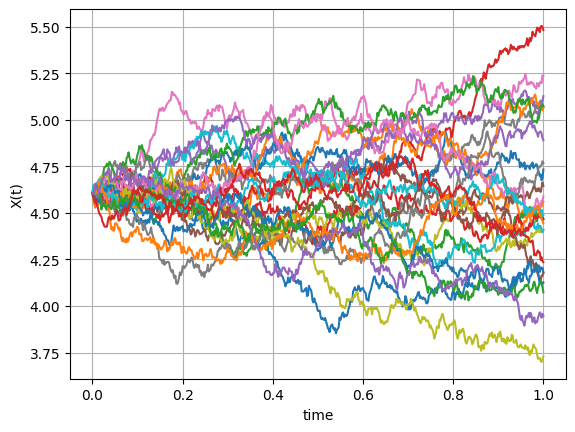

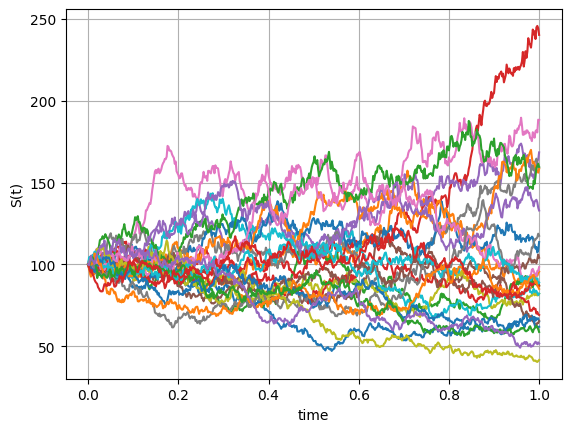

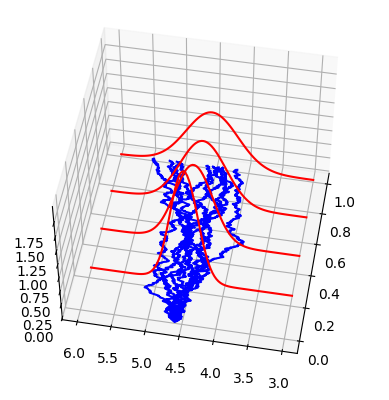

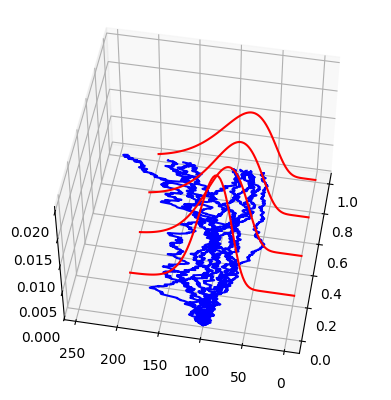

In [1]:
# Paths for the GBM and ABM
import numpy as np 
import matplotlib.pyplot as plt  
import scipy.stats as st 
from mpl_toolkits import mplot3d

def GeneratePathsGBMABM(NoOfPaths, NoOfSteps, T, r, sigma, S_0):
    Z = np.random.normal(0.0, 1.0, [NoOfPaths, NoOfSteps])
    X = np.zeros([NoOfPaths, NoOfSteps + 1])
    S = np.zeros([NoOfPaths, NoOfSteps + 1])
    time = np.zeros([NoOfSteps + 1])

    X[:, 0] = np.log(S_0)

    dt = T / float(NoOfSteps)
    for i in range(NoOfSteps):
        if NoOfPaths > 1:
            Z[:, i] = (Z[:, i] - np.mean(Z[:, i])) / np.std(Z[:, i])
        X[:, i + 1] = X[:, i] + (r - 0.5 * sigma * sigma) * dt + sigma * np.power(dt, 0.5) * Z[:, i]
        time[i + 1] = time[i] + dt  

    S = np.exp(X)
    paths = {'time': time, 'X': X, 'S': S}
    return paths 


def mainCalculation():
    NoOfPaths = 25 
    NoOfSteps = 500 
    T = 1 
    r = 0.05 
    sigma = 0.4 
    S_0 = 100

    Paths = GeneratePathsGBMABM(NoOfPaths, NoOfSteps, T, r, sigma, S_0) 
    timeGrid = Paths['time'] 
    X = Paths['X']
    S = Paths['S']

    plt.figure(1)
    plt.plot(timeGrid, np.transpose(X))
    plt.grid()
    plt.xlabel('time')
    plt.ylabel('X(t)')

    plt.figure(2)
    plt.plot(timeGrid, np.transpose(S)) 
    plt.grid()
    plt.xlabel('time')
    plt.ylabel('S(t)')
    
    fig = plt.figure(3)
    ax = fig.add_subplot(111, projection='3d')
    zline = np.zeros([len(timeGrid), 1])

    n = 10
    for i in range(n):
        y1 = np.squeeze(np.transpose(X[i, :]))
        x1 = timeGrid 
        z1 = np.squeeze(zline)
        ax.plot3D(x1, y1, z1, 'blue')

    ax.view_init(50, -170)

    Ti = np.linspace(0, T, 5)
    normPDF = lambda x, t: st.norm.pdf(x, np.log(S_0) + (r - 0.5 * sigma * sigma) * t, np.sqrt(t) * sigma)
    y1 = np.linspace(3, 6, 100)
    for ti in Ti:
        x1 = np.zeros([len(y1), 1]) + ti 
        z1 = normPDF(y1, ti) 
        ax.plot3D(np.ravel(x1), np.ravel(y1), np.ravel(z1), 'red')

    plt.figure(4)
    ax = plt.figure(4).add_subplot(111, projection='3d')
    zline = np.zeros([len(timeGrid), 1])

    for i in range(n):
        y1 = np.squeeze(np.transpose(S[i, :]))
        x1 = timeGrid
        z1 = np.squeeze(zline) 
        ax.plot3D(x1, y1, z1, 'blue')

    ax.view_init(50, -170)

    Ti = np.linspace(0, T, 5)

    lognnormPDF = lambda x, t: st.lognorm.pdf(x, scale=np.exp(np.log(S_0) + (r - 0.5 * sigma * sigma) * t), s=np.sqrt(t) * sigma)
    y1 = np.linspace(0, 200, 100)
    for ti in Ti:
        x1 = np.reshape(np.zeros(len(y1)) + ti, (-1, 1))
        z1 = lognnormPDF(y1, ti)
        ax.plot3D(np.ravel(x1), np.ravel(y1), np.ravel(z1), 'red')

    plt.show()

mainCalculation()
